### Problem statement
Leveraging the data provided by Scaler for a segment of learners, Cluster them on the basis of their job profile, company, and other features

In [1]:
#Importing libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df = pd.read_csv("C:/Users/USER/Downloads/scaler_clustering.csv",index_col=0)

In [3]:
df.sample(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
11100,ywr ntwyzgrgsxto,33a443ffc69a731df65c91ce28ce1744b20a50a48323c0...,2014.0,1200000,Data Scientist,2019.0
63245,nvnv wgzohrnvzwj otqcxwto,829fb1e461752290b552ed2e86ad95ccb0d80169c2c0e3...,2019.0,370000,Backend Engineer,2020.0
10507,or rhbvd,6b2a3e74a276d62cec6db9b4742d43d4eb6ed69e13aad3...,2017.0,440000,Other,2020.0
183207,ntqqvmrht dn,c608d9cfd85d1ff9bba513d8cfb13a8b30ff1457bbbd72...,2012.0,1000000,Data Scientist,2019.0
36788,zgn vuurxwvmrt,8fd4104e5cd4ac31670a337574bc1dc3f31eed4a6999b9...,2021.0,10000,NaN,2021.0
144647,cxqnhov,ace24ee0d6d95356a0a92c96232659ef2a4b7739425394...,2018.0,780000,Backend Engineer,2020.0
38392,bjznqv,2b67d5dcdfe7591a6fbed80e72dc8312a7cbd922d3f407...,2017.0,200000,NaN,2020.0
80331,xzegonqtnwy ogrhnxgzo,b594f634624e056368c56a6e072fd861635e448a13e11c...,2015.0,650000,SDET,2019.0
95363,xzahoztn ntwyzgrgsj ucn rna,0cbb4cda17c2893cb5f076ded4d70d663af96a743b3afd...,2012.0,700000,iOS Engineer,2019.0
197723,zgpxv,d3d1af6ceb3acb4a6ab3bdb4c580ada15d1c1e652f81ad...,2015.0,960000,FullStack Engineer,2019.0


In [4]:
df.shape

(205843, 6)

###### We have 205843 learners data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [6]:
#Cheking for Null values
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [7]:
(df.isna().sum()/ len(df))*100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [8]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


###### Based on above information , noticing some unusual outliers in the data  

In [9]:
df.describe(include="object")

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [10]:
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string
    
mystring='\tONGC\\\\&&**() Corp'
preprocess_string(mystring)

'ongc corp'

In [11]:
df["company_hash"].nunique()

37299

In [12]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x))) 
df["company_hash"].nunique()

37208

In [13]:
df["job_position"].nunique()

1017

###### 1017 unique job positions are there in the dataset 

In [14]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x))) 
df["job_position"].nunique()

857

###### 857 unique job positions are there in the dataset after preprocessing strings 

In [15]:
# removing the email_hash
df.drop("email_hash",axis = 1,inplace=True)

In [16]:
df.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
4353,nvnv wgzohrnvzwj otqcxwto,2018.0,800000,data scientist,2021.0
56011,otqcxwtzgf,2010.0,1500000,fullstack engineer,2019.0
64849,xxn yjatqvmva,2019.0,6300000,other,2017.0
67842,bvyxzaqv wgbcxcv,2019.0,600000,ios engineer,2019.0
170509,xzegojo,2014.0,550000,backend engineer,2017.0


In [17]:
df.duplicated().sum() # 17597 duplicated records

17597

In [18]:
df.isna().sum()

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [19]:
(df["company_hash"] == "").sum()

89

In [20]:
(df["company_hash"] == "nan").sum()

44

In [21]:
(df["job_position"] == "").sum()

9

In [22]:
(df["job_position"] == "nan").sum()

52562

##### Removing the records where company or job_position reocords are not available 

In [23]:
df[(df["company_hash"] == "") | (df["job_position"] == "")].sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
125001,,2020.0,2100000,data scientist,2019.0
125243,,2015.0,500000,engineering leadership,2019.0
200558,,2018.0,1000000,other,2019.0
156894,,2020.0,700000,nan,2020.0
11233,,2015.0,1100000,nan,2020.0
11038,,2018.0,840000,fullstack engineer,2019.0
47284,,2019.0,370000,engineering leadership,2021.0
5797,seo gxr svo axcxoxgz,2011.0,700000,,2021.0
188918,,2019.0,900000,nan,2020.0
38905,,2014.0,1700000,frontend engineer,2020.0


In [24]:
len(df[(df["company_hash"] == "") | (df["job_position"] == "")])

98

In [25]:
df = df[~((df["company_hash"] == "") | (df["job_position"] == ""))]
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


# Data Preprocessing 

In [26]:
df["orgyear"].isna().sum()

86

###### Imputing Start Year as per the median year as per each company.

In [27]:
df.groupby("company_hash")["orgyear"].transform("median")

0         2014.0
1         2016.0
2         2015.0
3         2016.0
4         2017.0
           ...  
206918    2018.0
206919    2017.0
206920    2016.0
206921    2020.0
206922    2015.0
Name: orgyear, Length: 205745, dtype: float64

In [28]:
df["orgyear"].fillna(df['orgyear'].isnull().sum(),inplace=True)

In [29]:
df["orgyear"].isna().sum()

0

In [30]:
df.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
60654,vwwtznhqt,2020.0,830000,nan,2019.0
100355,yghoxzswgb,2019.0,1000000,nan,2019.0
152903,srgmvr rgsxonxwo,2017.0,1200000,nan,2021.0
121986,oguqv ontqxv,2017.0,620000,backend engineer,2021.0
117153,mvzp ge vbtqxwv,2009.0,3200000,backend engineer,2021.0


# Outliers  Treatment : 

- ### Employement start year 

In [31]:
df["orgyear"].value_counts()

2018.0    25240
2019.0    23402
2017.0    23237
2016.0    23038
2015.0    20602
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: orgyear, Length: 78, dtype: int64

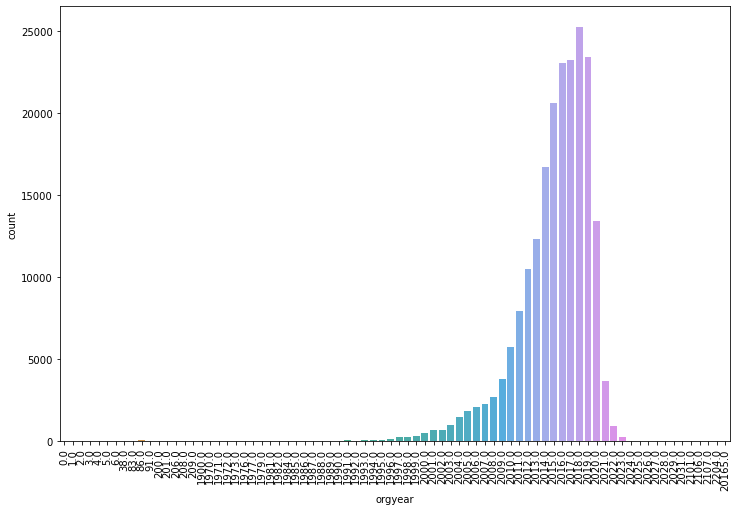

In [32]:
sns.countplot(df["orgyear"])
plt.xticks(rotation = 90)
plt.show()

In [33]:
df["orgyear"].quantile(0.001)

1990.0

In [34]:
df["orgyear"].quantile(0.999)

2023.0

In [35]:
df["orgyear"] = df["orgyear"].clip(1990,2022)

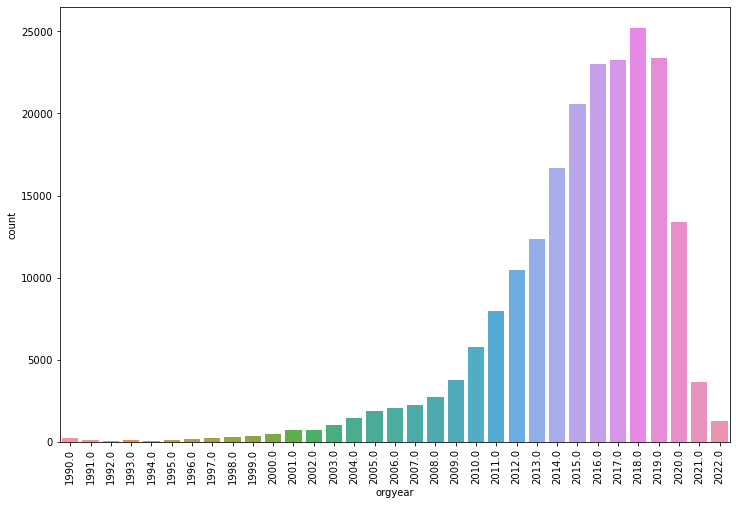

In [36]:
sns.countplot(df["orgyear"])
plt.xticks(rotation = 90)
plt.show()

- ### ctc updated_year  

In [37]:
df["ctc_updated_year"].quantile(0.001)

2015.0

In [38]:
df["ctc_updated_year"].quantile(0.99)

2021.0

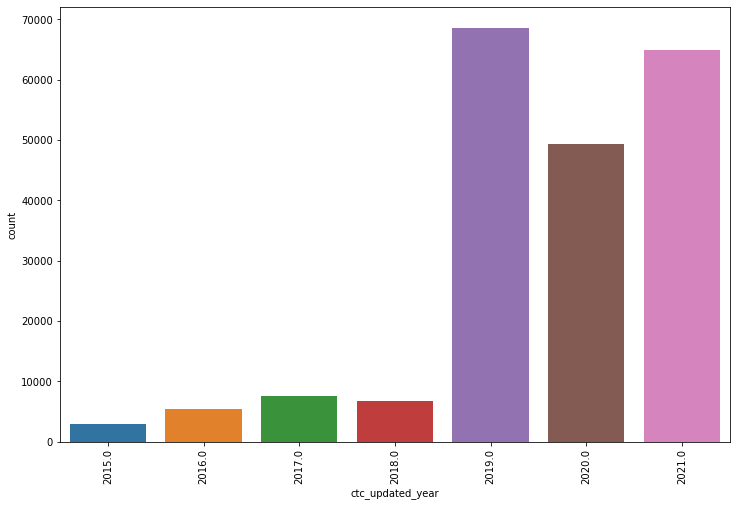

In [39]:
sns.countplot(df["ctc_updated_year"])
plt.xticks(rotation = 90)
plt.show()

- ### Outlier treatment for CTC 

In [40]:
df["ctc"].quantile(0.01)

37000.0

In [41]:
df["ctc"].quantile(0.999)

200000000.0

In [42]:
df = df.loc[((df.ctc) > df.ctc.quantile(0.01)) & ((df.ctc) < df.ctc.quantile(0.99))]

In [43]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


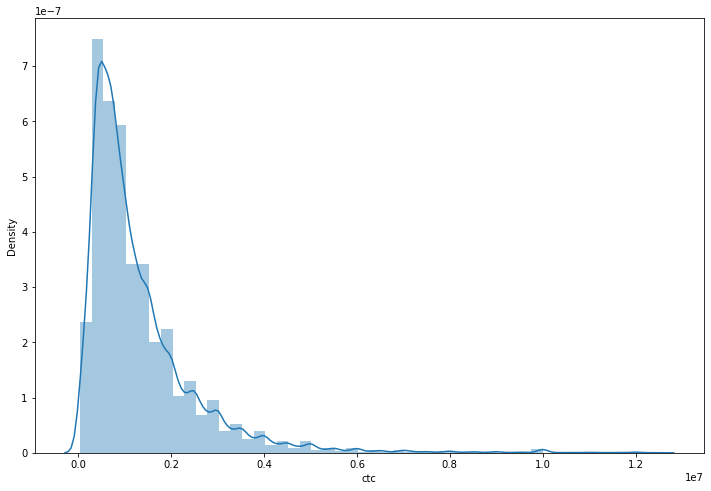

In [44]:
sns.distplot(df["ctc"])
plt.show()

- replacing string "nan" to np.nan 

In [45]:
df.loc[df['job_position']=='nan', 'job_position']=np.nan

In [46]:
df.loc[df["company_hash"]=="nan","company_hash"] = np.nan

# Feature Engineering 

### Masked company name to "Others" having count less than 5 

In [47]:
df.loc[df.groupby("company_hash")["ctc"].transform("count") < 5,"company_hash"] = "Others"

In [48]:
(df["company_hash"] == "Others").sum()

46434

In [49]:
df['orgyear'].describe()

count    201625.000000
mean       2015.104769
std           4.256063
min        1990.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2022.000000
Name: orgyear, dtype: float64

#### years of experience =  current year - employement start year

In [50]:
# years of experience 
df["years_of_experience_in_organization"] = 2023 - df["orgyear"] 


In [51]:
df.sample(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
32258,btznxgz utgurt xz jghq ugono,2018.0,780000,NaN,2020.0,5.0
87660,Others,2009.0,120000,backend engineer,2018.0,14.0


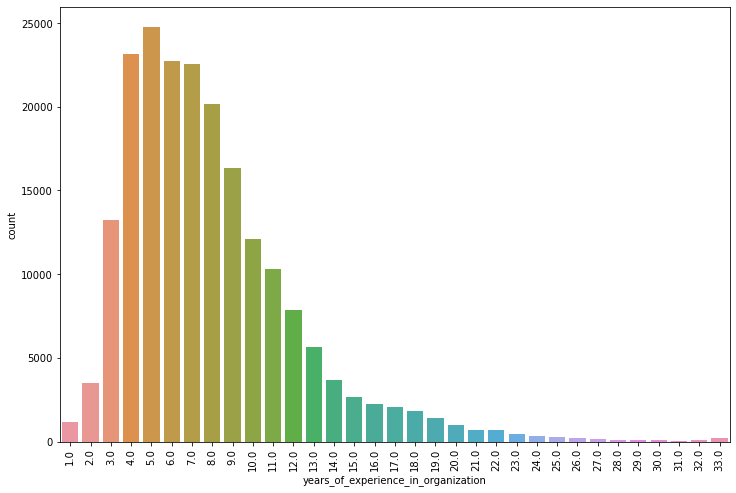

In [52]:
sns.countplot(df["years_of_experience_in_organization"])
plt.xticks(rotation = 90)
plt.show()

In [53]:
df.drop_duplicates(inplace=True)
df.shape

(163942, 6)

In [54]:
df.isna().sum()


company_hash                              42
orgyear                                    0
ctc                                        0
job_position                           36745
ctc_updated_year                           0
years_of_experience_in_organization        0
dtype: int64

#### treating records having ctc_updated_year higher than their organization joining year


In [55]:
# records having ctc_updated_year higher than their organization joining year
(df["ctc_updated_year"] < df["orgyear"]).sum()

7181

In [56]:
df.ctc_updated_year = df[["ctc_updated_year","orgyear"]].max(axis = 1)

In [57]:
(df["ctc_updated_year"] < df["orgyear"]).sum()

0

In [58]:
df.sample(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
131763,vbtqxwvz tduqtoo,2019.0,1228000,backend engineer,2021.0,4.0
59788,nxvv,2014.0,1250000,NaN,2021.0,9.0


####  Filling null values with others  -- if not done before


In [59]:
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [60]:
df.isna().sum()


company_hash                           0
orgyear                                0
ctc                                    0
job_position                           0
ctc_updated_year                       0
years_of_experience_in_organization    0
dtype: int64

In [61]:
df.duplicated().sum()


1061

In [62]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization
count,163942.000000,1.639420e+05,163942.000000,163942.000000
mean,2014.772218,1.425498e+06,2019.595540,8.227782
std,4.402053,1.303985e+06,1.334962,4.402053
min,1990.000000,3.800000e+04,2015.000000,1.000000
25%,2013.000000,6.000000e+05,2019.000000,5.000000
50%,2016.000000,1.039999e+06,2020.000000,7.000000
75%,2018.000000,1.800000e+06,2021.000000,10.000000
max,2022.000000,1.250000e+07,2022.000000,33.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163942 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   company_hash                         163942 non-null  object 
 1   orgyear                              163942 non-null  float64
 2   ctc                                  163942 non-null  int64  
 3   job_position                         163942 non-null  object 
 4   ctc_updated_year                     163942 non-null  float64
 5   years_of_experience_in_organization  163942 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.8+ MB


<AxesSubplot:xlabel='ctc', ylabel='years_of_experience_in_organization'>

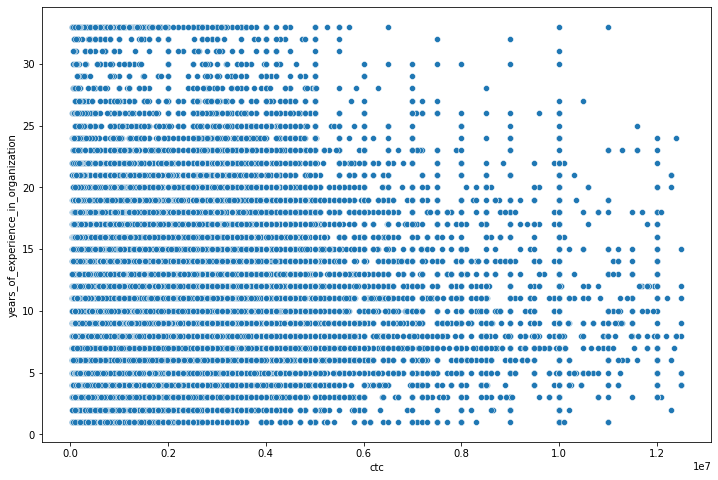

In [64]:
sns.scatterplot(df.ctc,df.years_of_experience_in_organization)

In [65]:
df.columns


Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization'],
      dtype='object')

### Manual Clustering based on Company , Job position and Years of experience

### Learner's "designation_in_organization"

In [66]:
GROUPED_CTC = df.groupby(["years_of_experience_in_organization",
                                                         "job_position",
                                                         "company_hash"])["ctc"].describe() 

In [67]:
GROUPED_CTC

count  \
years_of_experience_in_organization job_position       company_hash                               
1.0                                 Others             Others                              58.0   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz        1.0   
                                                       atrgxnnt                             1.0   
                                                       atrr                                 1.0   
                                                       atrr ntwyzgrgsxto                    2.0   
...                                                                                         ...   
33.0                                qa engineer        hzxntaytvrny sqghu                   1.0   
                                                       tmxd ogenfvqt xzaxv ucn rna          1.0   
                                                       utrvnqg ogrhnxgzo ucnrna             1.0   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx    1.0   
                                    support engineer   Others                               2.0   

                                                                                                  mean  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             1.586207e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz      1.600000e+06   
                                                       atrgxnnt                           1.000000e+06   
                                                       atrr                               1.000000e+06   
                                                       atrr ntwyzgrgsxto                  1.000000e+06   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                 5.400000e+05   
                                                       tmxd ogenfvqt xzaxv ucn rna        1.220000e+06   
                                                       utrvnqg ogrhnxgzo ucnrna           6.000000e+05   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx  1.400000e+06   
                                    support engineer   Others                             3.700000e+05   

                                                                                                   std  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             2.080212e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz               NaN   
                                                       atrgxnnt                                    NaN   
                                                       atrr                                        NaN   
                                                       atrr ntwyzgrgsxto                  2.828427e+05   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                          NaN   
                                                       tmxd ogenfvqt xzaxv ucn rna                 NaN   
                                                       utrvnqg ogrhnxgzo ucnrna                    NaN   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx           NaN   
                                    support engineer   Others                             3.252691e+05   

                                            

In [68]:
df_GROUPED_CTC_BY_E_P_C = df.merge(GROUPED_CTC,
        on = ["years_of_experience_in_organization",
              "job_position",
              "company_hash"],
        how = "left")

In [69]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0


In [70]:
def classification(x,ctc_50,ctc_75):
    if x < ctc_50:
        return 3
    elif x >= ctc_50 and x <= ctc_75:
        return 2
    elif  x >= ctc_75:
        return 1

#### whichever learner has ctc compared to their years of experience , respective company , position
#### giving designation as 3 when ctc is < 50th percentile in his position ,experience and company
#### giving designation as 2 when ctc is between  50th and 75th percentile in his position ,experience and company
#### giving designation as 1 when ctc is > 75th percentile in his position ,experience and company

In [71]:
df_GROUPED_CTC_BY_E_P_C["designation_in_organization"] = df_GROUPED_CTC_BY_E_P_C.apply(lambda x:classification(x["ctc"],x["50%"],x["75%"]),axis = 1)

In [72]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [73]:
df_GROUPED_CTC_BY_E_P_C.designation_in_organization.value_counts(normalize=True)

2    0.456393
3    0.331660
1    0.211947
Name: designation_in_organization, dtype: float64

In [74]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [75]:
df_GROUPED_CTC_BY_E_P_C.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)


In [76]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2
...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1


In [77]:
df_GROUPED_CTC_BY_E_P_C.shape

(163942, 7)

## Manual Clustering on company and job position 

##### grouping by each job_position and company ,
##### finding which class of job an individual have, 
##### based on his ctc compared to his job_position and respective company.

In [78]:
GROUPED_C_J=df.groupby(['job_position','company_hash'])['ctc'].describe()
GROUPED_C_J

count  \
job_position          company_hash                                       
Others                Others                                    3520.0   
                      a ntwyzgrgsxto                               6.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0   
                      abwavnv ojontb                               1.0   
                      adw ntwyzgrgsj                              69.0   
...                                                                ...   
wordpress developer   Others                                       1.0   
worker                zgn vuurxwvmrt vwwghzn                       1.0   
x                     Others                                       1.0   
young professional ii sgctqzbtzn ge xzaxv                          1.0   
zomato                kgbvng                                       2.0   

                                                                        mean  \
job_position          company_hash                                             
Others                Others                                    1.366188e+06   
                      a ntwyzgrgsxto                            1.229167e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  5.000000e+05   
                      abwavnv ojontb                            7.000000e+05   
                      adw ntwyzgrgsj                            8.502319e+05   
...                                                                      ...   
wordpress developer   Others                                    6.000000e+05   
worker                zgn vuurxwvmrt vwwghzn                    2.000000e+05   
x                     Others                                    4.000000e+05   
young professional ii sgctqzbtzn ge xzaxv                       5.000000e+05   
zomato                kgbvng                                    3.000000e+05   

                                                                         std  \
job_position          company_hash                                             
Others                Others                                    1.445330e+06   
                      a ntwyzgrgsxto                            1.401465e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna           NaN   
                      abwavnv ojontb                                     NaN   
                      adw ntwyzgrgsj                            1.036041e+06   
...                                                                      ...   
wordpress developer   Others                                             NaN   
worker                zgn vuurxwvmrt vwwghzn                             NaN   
x                     Others                                             NaN   
young professional ii sgctqzbtzn ge xzaxv                                NaN   
zomato                kgbvng                                    2.828427e+05   

                                                                     min  \
job_position          company_hash                                         
Others                Others                                     40000.0   
                      a ntwyzgrgsxto                            350000.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0   
                      abwavnv ojontb                            700000.0   
                      adw ntwyzgrgsj                             80000.0   
...                                                                  ...   
wordpress developer   Others                                    600000.0   
worker                zgn vuurxwvmrt vwwghzn                    200000.0   
x                     Others                                    400000.0   
young professional ii sgctqzbtzn ge xzaxv                       500000.0   
zomato                kgbvng                                    100000.0   

                               

In [79]:
df_GROUPED_C_J=df.merge(GROUPED_C_J, on=['job_position','company_hash'], how='left')


In [80]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
104990,xzaftvrny,2016.0,1300000,backend engineer,2020.0,7.0,9.0,1.603333e+06,4.624392e+05,1100000.0,1380000.0,1500000.0,1600000.0,2650000.0
21480,x vb v onhatzn ge uvooxzs mvnwy,2020.0,500000,qa engineer,2021.0,3.0,1.0,5.000000e+05,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
97830,bowx xzw,2009.0,6660000,other,2020.0,14.0,5.0,3.810000e+06,1.849351e+06,2320000.0,2600000.0,2770000.0,4700000.0,6660000.0
54820,ihvrwgbb,2013.0,1860000,android engineer,2019.0,10.0,17.0,1.893529e+06,9.134615e+05,90000.0,1200000.0,1860000.0,2700000.0,3200000.0
3777,vwwtznhqt,2014.0,700000,Others,2020.0,9.0,518.0,9.419289e+05,8.823661e+05,150000.0,500000.0,720000.0,1089750.0,9800000.0


In [81]:
# creating classes basis on the salary in their respective company

In [82]:
df_GROUPED_C_J['classs'] = df_GROUPED_C_J.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)


In [83]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,classs
16461,wxnxhontwy,2016.0,2100000,Others,2021.0,7.0,14.0,9.142857e+05,4.974661e+05,300000.0,600000.0,850000.0,1125000.00,2100000.0,1
130855,Others,2018.0,1800000,fullstack engineer,2020.0,5.0,3181.0,1.193104e+06,1.532888e+06,40000.0,350000.0,775000.0,1450000.00,12000000.0,1
22766,Others,2014.0,2000000,Others,2020.0,9.0,3520.0,1.366188e+06,1.445330e+06,40000.0,409999.0,900000.0,1842499.25,12500000.0,1
122459,tuoxrgz,2007.0,3000000,product manager,2021.0,16.0,1.0,3.000000e+06,NaN,3000000.0,3000000.0,3000000.0,3000000.00,3000000.0,2
61215,ztfstz ogenfvqt,2018.0,524000,backend engineer,2019.0,5.0,83.0,7.420964e+05,6.858010e+05,200000.0,500000.0,600000.0,722500.00,5500000.0,3


In [84]:
df_GROUPED_C_J.classs.value_counts(normalize=True)

3    0.435373
2    0.320101
1    0.244526
Name: classs, dtype: float64

In [85]:
df_GROUPED_C_J.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)


In [86]:
df_GROUPED_CTC_BY_E_P_C.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
Name: 0, dtype: object

In [87]:
df_GROUPED_C_J.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
classs                                              1
Name: 0, dtype: object

In [88]:
df_Grouped = df_GROUPED_CTC_BY_E_P_C.merge(df_GROUPED_C_J, on=['company_hash',
                                                      'orgyear',
                                                      'ctc',
                                                      'job_position',
                                                      'years_of_experience_in_organization',
                                                      'ctc_updated_year'], how='left')


In [89]:
df_Grouped.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs
66912,wgsgugqn,2019.0,1050000,fullstack engineer,2021.0,4.0,3,3
9154,Others,2019.0,850000,fullstack engineer,2020.0,4.0,2,2
140022,erxupvqn,2016.0,2280000,backend engineer,2019.0,7.0,3,3
149615,Others,1992.0,62000,fullstack engineer,2021.0,31.0,2,3
83307,Others,2019.0,370000,data analyst,2021.0,4.0,3,3


In [90]:
df_Grouped.shape

(166228, 8)

## Manual Clustering based on comapny

##### based on ctc per company , assigning company as tier 1 2 and 3 per each learners 

In [91]:
GROUPED_C = df.groupby(['company_hash'])['ctc'].describe()
df_company = df.merge(GROUPED_C, on=['company_hash'], how='left')


In [92]:
df_company.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
60607,wxnxhontwy,2016.0,600000,Others,2021.0,7.0,69.0,1.018406e+06,9.996714e+05,300000.0,600000.0,850000.0,1120000.0,8500000.0
135601,eqttrvzwt atctrgutq,2006.0,1600000,ios engineer,2019.0,17.0,48.0,1.251354e+06,1.409033e+06,46000.0,300000.0,800000.0,1625000.0,8500000.0
89728,ntrtutqegqbvzwt,2016.0,400000,other,2021.0,7.0,85.0,5.459765e+05,4.526019e+05,100000.0,300000.0,400000.0,630000.0,2800000.0
121391,onhatzn,2019.0,450000,backend engineer,2021.0,4.0,519.0,1.318597e+06,1.392236e+06,51000.0,489999.5,1000000.0,1700000.0,12100000.0
103419,oxtbtzo ntwyzgrgsj xzaxv,2014.0,860000,qa engineer,2019.0,9.0,55.0,1.258655e+06,7.203976e+05,200000.0,750000.0,1000000.0,1525000.0,3000000.0


In [93]:
df_company['tier'] =df_company.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)


In [94]:
df_company.tier.value_counts(normalize=True)

3    0.477364
2    0.282911
1    0.239725
Name: tier, dtype: float64

In [95]:
df_company.drop(['count','mean','std','min','25%','50%','75%','max'],
               axis = 1,
               inplace=True)

In [96]:
df_company.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
tier                                                2
Name: 0, dtype: object

In [97]:
df_Grouped.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
classs                                              1
Name: 0, dtype: object

In [98]:
df_Grouped = df_Grouped.merge(df_company,
                 on=['company_hash',
                     'orgyear','ctc',
                     'job_position',
                     'years_of_experience_in_organization',
                     'ctc_updated_year'
                    ])

In [99]:
df_Grouped

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...,...,...
171311,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2,3,3
171312,husqvawgb,2017.0,500000,Others,2020.0,6.0,3,3,3
171313,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2,3,3
171314,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1,1,1


In [125]:
df_Grouped.sort_values(by = ['ctc'], ascending = False).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
57750,zvz,2019.0,12500000,Others,2019.0,4.0,1,1,1
152160,bxwqgogen,2014.0,12500000,fullstack engineer,2019.0,9.0,1,1,1
57238,uvjuvr,2015.0,12500000,backend engineer,2017.0,8.0,1,1,1
110982,xzntr wgqugqvnxgz,2018.0,12500000,frontend engineer,2019.0,5.0,1,1,1
92367,zgn vuurxwvmrt vwwghzn,2019.0,12500000,frontend engineer,2021.0,4.0,1,1,1
71783,Others,2008.0,12500000,Others,2020.0,15.0,1,1,1
101860,zgn vuurxwvmrt vwwghzn,2019.0,12500000,other,2021.0,4.0,1,1,1
64255,wmqt,2018.0,12500000,frontend engineer,2020.0,5.0,2,1,1
15917,vrnxbtnqxp,2012.0,12500000,fullstack engineer,2020.0,11.0,1,1,1
63760,vbvkgz,2011.0,12500000,other,2018.0,12.0,1,1,1


###### Above are the 10 learners with highest CTC

In [131]:
df_Grouped[(df_Grouped['company_hash'] == 'zvz') 
           & (df_Grouped['job_position'] == 'data scientist')].sort_values(by = ['ctc'], ascending = False).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
133968,zvz,2019.0,3200000,data scientist,2019.0,4.0,1,1,1
132885,zvz,2022.0,3000000,data scientist,2022.0,1.0,1,1,1
124184,zvz,2022.0,2800000,data scientist,2022.0,1.0,1,1,1
162366,zvz,2022.0,2100000,data scientist,2022.0,1.0,2,1,1
160406,zvz,2020.0,2000000,data scientist,2021.0,3.0,1,1,1
165427,zvz,2015.0,2000000,data scientist,2021.0,8.0,1,1,1
55947,zvz,2019.0,1860000,data scientist,2019.0,4.0,1,1,1
150959,zvz,2019.0,1800000,data scientist,2021.0,4.0,2,1,1
168266,zvz,2021.0,1800000,data scientist,2021.0,2.0,1,1,1
142945,zvz,2018.0,1700000,data scientist,2018.0,5.0,1,1,1


###### Above are the top 10 employees of data science in Company ZVZ earning more than their peers 

In [132]:
df_Grouped[(df_Grouped['company_hash'] == 'zvz') 
           & (df_Grouped['job_position'] == 'data scientist')].sort_values(by = ['ctc']).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
48328,zvz,2017.0,46500,data scientist,2017.0,6.0,2,3,3
144575,zvz,2015.0,107000,data scientist,2021.0,8.0,3,3,3
75104,zvz,2022.0,300000,data scientist,2022.0,1.0,3,3,3
94711,zvz,2019.0,450000,data scientist,2021.0,4.0,3,3,3
169411,zvz,2021.0,500000,data scientist,2021.0,2.0,3,3,3
130100,zvz,2020.0,530000,data scientist,2021.0,3.0,3,3,3
165310,zvz,2022.0,600000,data scientist,2022.0,1.0,3,3,3
71493,zvz,2021.0,600000,data scientist,2021.0,2.0,3,3,3
169115,zvz,2016.0,600000,data scientist,2021.0,7.0,3,3,3
157322,zvz,2019.0,620000,data scientist,2020.0,4.0,3,3,3


###### Above are the bottom 10 employees of data science in Company ZVZ earning less than their peers

In [136]:
df_Grouped[(df_Grouped['company_hash'] == 'zvz') 
           & (df_Grouped['job_position'] == 'data scientist') & 
           (df_Grouped['years_of_experience_in_organization'].isin([5.0,6.0,7.0]))].sort_values(by = ['ctc'], 
                                                                                                ascending = False).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
142945,zvz,2018.0,1700000,data scientist,2018.0,5.0,1,1,1
145734,zvz,2016.0,1600000,data scientist,2019.0,7.0,1,2,2
130092,zvz,2016.0,1540000,data scientist,2021.0,7.0,2,2,2
166605,zvz,2018.0,1500000,data scientist,2021.0,5.0,2,2,2
120262,zvz,2016.0,830000,data scientist,2019.0,7.0,3,3,3
154968,zvz,2018.0,750000,data scientist,2021.0,5.0,3,3,3
169115,zvz,2016.0,600000,data scientist,2021.0,7.0,3,3,3
48328,zvz,2017.0,46500,data scientist,2017.0,6.0,2,3,3


###### Above are the top 10 employees in ZVZ- data science department - having 5/6/7 years of experience earning more than their peers

In [126]:
df_Grouped.sort_values(by = ['ctc']).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
57834,Others,2007.0,38000,devops engineer,2018.0,16.0,3,3,3
121681,Others,2015.0,38000,other,2017.0,8.0,3,3,3
167264,xb v onhatzn,2022.0,38000,Others,2022.0,1.0,3,3,3
82936,zgn vuurxwvmrt vwwghzn,2015.0,38000,frontend engineer,2021.0,8.0,3,3,3
131466,bwpxzotj,2020.0,39000,Others,2021.0,3.0,2,3,3
114259,zgzt,2017.0,39000,backend engineer,2017.0,6.0,3,3,3
152883,bwpxzotj,2020.0,39000,data scientist,2021.0,3.0,2,3,3
21648,rvkvav sqghu,2013.0,39000,backend engineer,2020.0,10.0,2,3,3
81857,Others,2017.0,39000,backend engineer,2020.0,6.0,3,3,3
126395,vnytzvytvrny,2007.0,39550,fullstack engineer,2019.0,16.0,2,3,3


###### Above are the bottom 10 employees who are earning less than most of the employees

In [137]:
df_company.sort_values(by = ['ctc'], ascending = False).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,tier
52778,zvz,2019.0,12500000,Others,2019.0,4.0,1
66047,Others,2008.0,12500000,Others,2020.0,15.0,1
103959,xzntr wgqugqvnxgz,2018.0,12500000,frontend engineer,2019.0,5.0,1
52304,uvjuvr,2015.0,12500000,backend engineer,2017.0,8.0,1
58926,wmqt,2018.0,12500000,frontend engineer,2020.0,5.0,1
144753,bxwqgogen,2014.0,12500000,fullstack engineer,2019.0,9.0,1
95050,zgn vuurxwvmrt vwwghzn,2019.0,12500000,other,2021.0,4.0,1
58465,vbvkgz,2011.0,12500000,other,2018.0,12.0,1
13904,vrnxbtnqxp,2012.0,12500000,fullstack engineer,2020.0,11.0,1
86045,zgn vuurxwvmrt vwwghzn,2019.0,12500000,frontend engineer,2021.0,4.0,1


###### Above are the top 10 companies based on their CTC

In [138]:
df_company.sort_values(by = ['ctc']).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,tier
159849,xb v onhatzn,2022.0,38000,Others,2022.0,1.0,3
114413,Others,2015.0,38000,other,2017.0,8.0,3
52836,Others,2007.0,38000,devops engineer,2018.0,16.0,3
76799,zgn vuurxwvmrt vwwghzn,2015.0,38000,frontend engineer,2021.0,8.0,3
19130,rvkvav sqghu,2013.0,39000,backend engineer,2020.0,10.0,3
124164,bwpxzotj,2020.0,39000,Others,2021.0,3.0,3
107164,zgzt,2017.0,39000,backend engineer,2017.0,6.0,3
145467,bwpxzotj,2020.0,39000,data scientist,2021.0,3.0,3
75738,Others,2017.0,39000,backend engineer,2020.0,6.0,3
119113,vnytzvytvrny,2007.0,39550,fullstack engineer,2019.0,16.0,3


###### Above are the bottom 10 companies based on their CTC

In [100]:
X = df_Grouped.copy()

In [101]:
X.shape

(171316, 9)

In [102]:
X_data = X.drop(["company_hash","job_position"],axis  = 1)

## Final data for Model : 

In [103]:
X_data

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,2016.0,1100000,2020.0,7.0,2,1,2
1,2018.0,449999,2019.0,5.0,3,3,3
2,2015.0,2000000,2020.0,8.0,1,1,1
3,2017.0,700000,2019.0,6.0,3,3,3
4,2017.0,1400000,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...
171311,2008.0,220000,2019.0,15.0,2,3,3
171312,2017.0,500000,2020.0,6.0,3,3,3
171313,2021.0,700000,2021.0,2.0,2,3,3
171314,2019.0,5100000,2019.0,4.0,1,1,1


## Standardization: 

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_data)
X_sc = pd.DataFrame(scaler.transform(X_data), columns=X_data.columns, index=X_data.index)

In [105]:
X_sc

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,0.229439,-0.238430,0.298195,-0.229439,-0.175910,-1.497105,-0.300556
1,0.680950,-0.741765,-0.452799,-0.680950,1.196414,1.001707,0.933655
2,0.003683,0.458493,0.298195,-0.003683,-1.548235,-1.497105,-1.534766
3,0.455194,-0.548174,-0.452799,-0.455194,1.196414,1.001707,0.933655
4,0.455194,-0.006122,-0.452799,-0.455194,-0.175910,-1.497105,-1.534766
...,...,...,...,...,...,...,...
171311,-1.576605,-0.919866,-0.452799,1.576605,-0.175910,1.001707,0.933655
171312,0.455194,-0.703046,0.298195,-0.455194,1.196414,1.001707,0.933655
171313,1.358216,-0.548174,1.049190,-1.358216,-0.175910,1.001707,0.933655
171314,0.906705,2.859008,-0.452799,-0.906705,-1.548235,-1.497105,-1.534766


## hierarchical Custering : 

#### trying to get a high level idea about how many clusters we can from, by taking sample of 500 learners multiple times and forming hierarchy and visualising in dendrogram. 

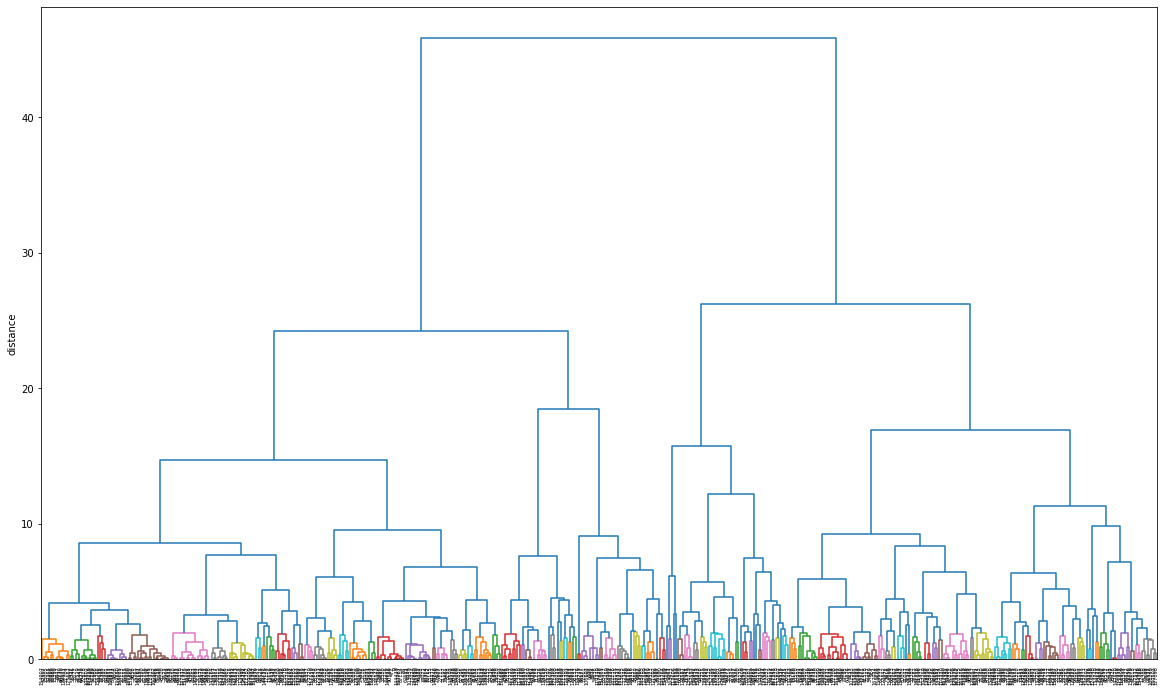

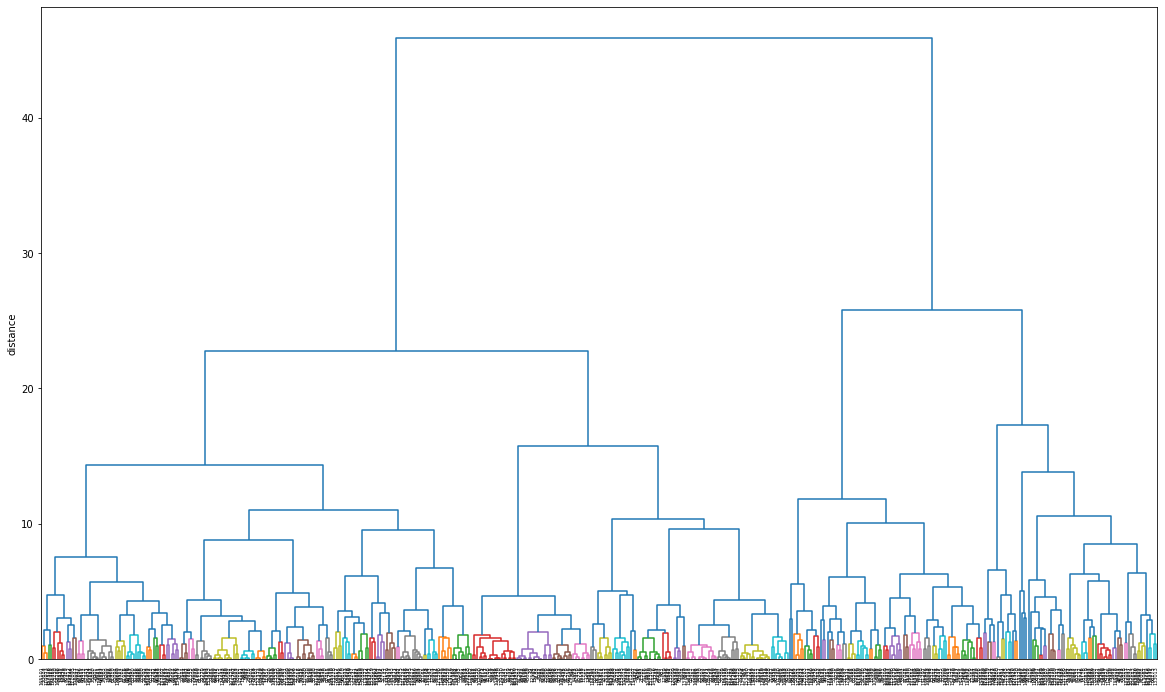

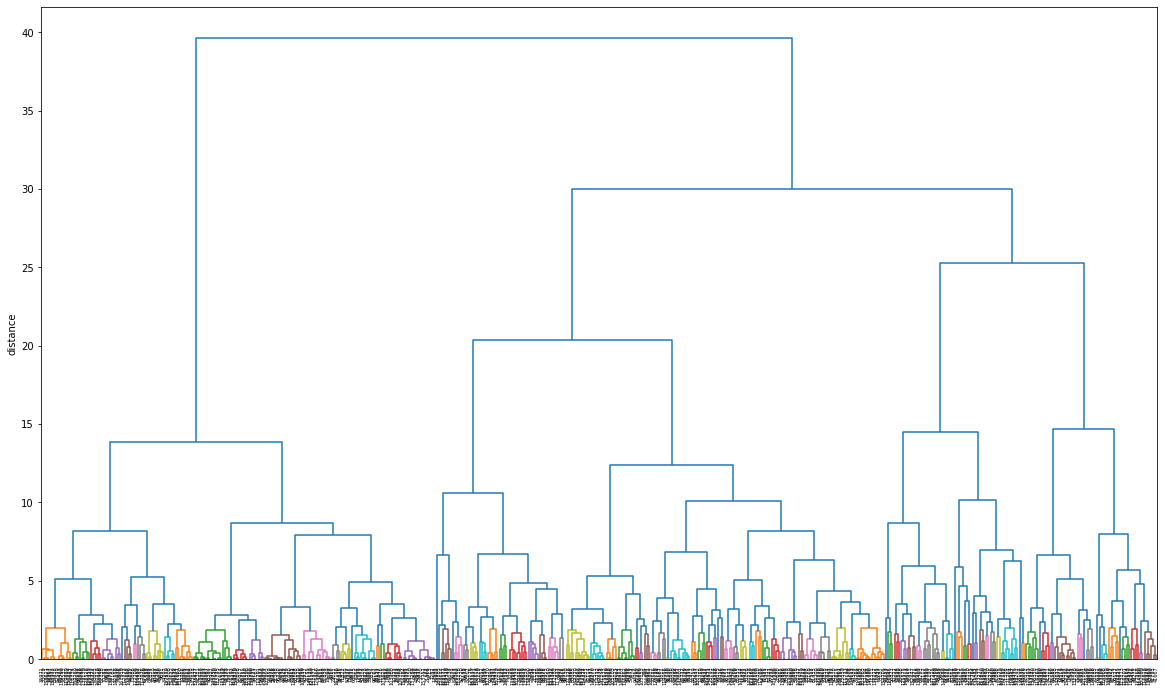

In [106]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax2 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax2.set_ylabel('distance')
plt.show()



import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax3 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax3.set_ylabel('distance')
plt.show()

#### Based on dendrogram , we can observe there are 3 clusters in the data based on similarity  

#### Further checking appropriate number of clusters using Elbow Method using k-Means clustering : 

## KMeans

In [107]:
for i in range(1,10):
    from sklearn.cluster import KMeans

    k = 4

    kM = KMeans(n_clusters=k,
               random_state=654)
    y_pred = kM.fit_predict(X_sc)


In [108]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_sc)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[1199211.9999999986,
 812618.2236265251,
 663951.3689564554,
 577020.6292578046,
 517714.4060221888,
 476402.9017863567,
 439357.9614105885,
 410144.6171733509,
 383988.5907258126]

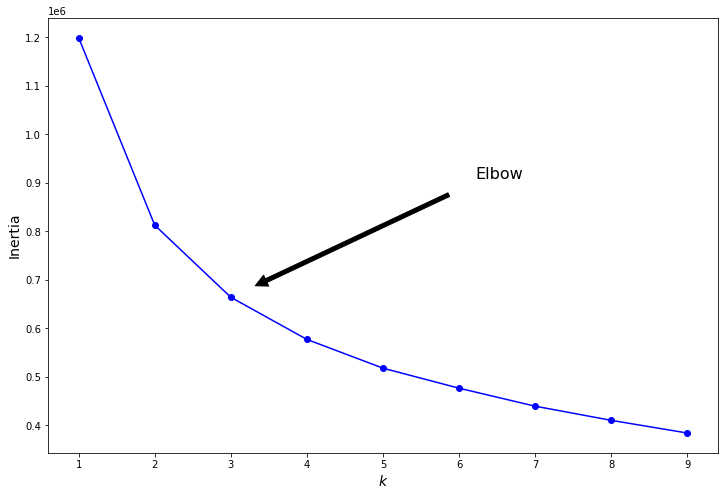

In [109]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

# KMeans with n_clusters = 3

In [110]:
from sklearn.cluster import KMeans

k = 3

kM = KMeans(n_clusters=k,
           random_state=654)
y_pred = kM.fit_predict(X_sc)


In [111]:
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [112]:
clusters.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier,label
44920,zgn vuurxwvmrt vwwghzn,2022.0,200000,fullstack engineer,2022.0,1.0,3,3,3,2
42805,ozvuatvr,2009.0,3850000,engineering leadership,2019.0,14.0,1,1,1,0
69097,fxuqg rxbxnta,2014.0,1100000,database administrator,2017.0,9.0,2,1,1,1
129744,vbvkgz,2017.0,500000,support engineer,2021.0,6.0,3,3,3,2
52518,wvuxrrvqj ntwyzgrgsxto,2017.0,2000000,backend engineer,2021.0,6.0,2,2,2,1


In [113]:
clusters.shape

(171316, 10)

# Insights |  EDA after Clustering : 

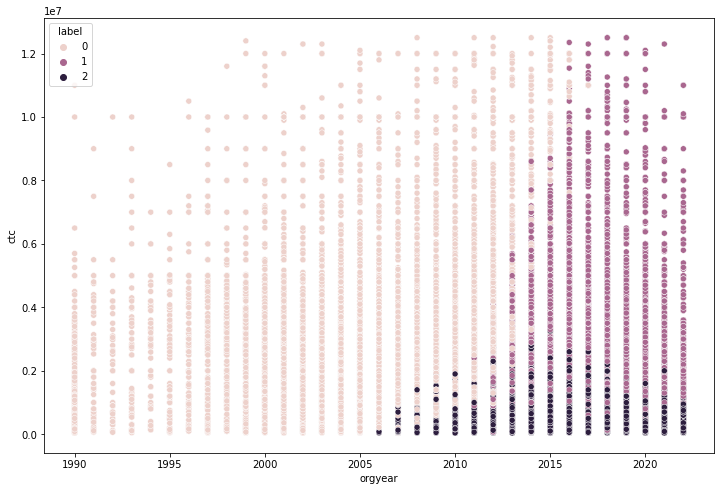

In [114]:
sns.scatterplot(clusters["orgyear"],
               clusters["ctc"],
               hue = clusters["label"])
plt.show()

#### based on above scatter plot , we can observe , a cluster of learners received CTC upto 30 LPA  who joined after 2006-07.
#### there's a group of learners who are very much experienced.
#### and also learners joined after 2012-13 receiving CTC between 20 LPA to upto 1.5cr.

<AxesSubplot:xlabel='label'>

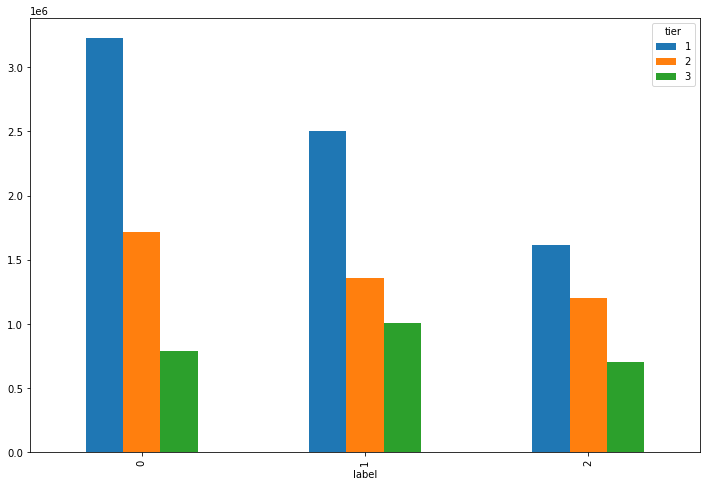

In [115]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

### Based on k-Means Clustering algorithm output  , as well as manual clustering , learners from tier1 company receiving very high CTC. 


<AxesSubplot:xlabel='label'>

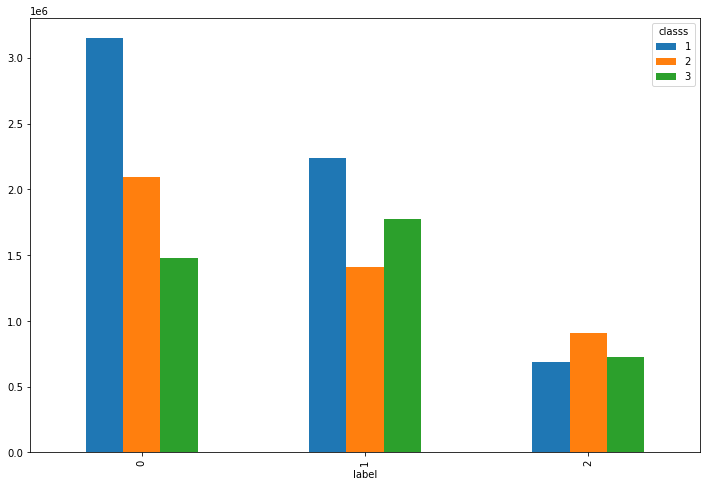

In [116]:
pd.crosstab(index = clusters["label"],
    columns = clusters["classs"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<AxesSubplot:xlabel='label'>

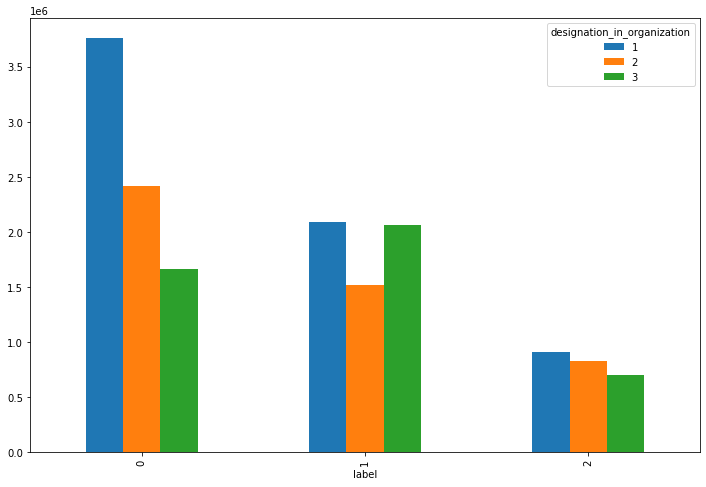

In [117]:
pd.crosstab(index = clusters["label"],
    columns = clusters["designation_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<AxesSubplot:xlabel='years_of_experience_in_organization'>

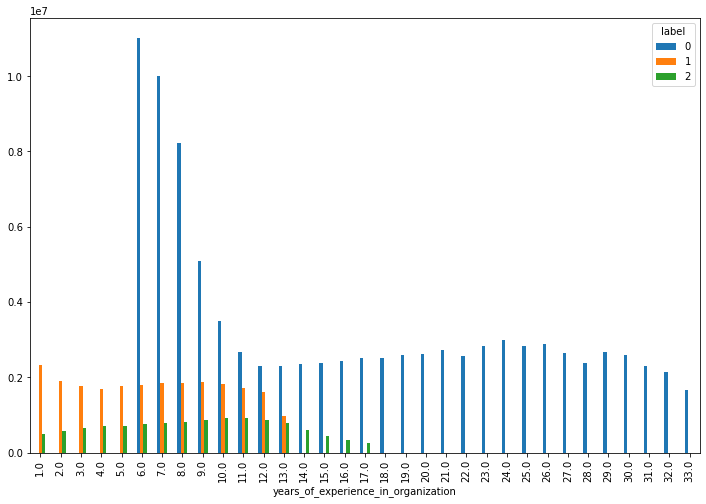

In [118]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

### Cluster label  0 , are those learners who are very very experienced,
### experienced learners between 6 to 10 years of experience, earning above 40 LPA up to 1.5Cr. 

<AxesSubplot:xlabel='years_of_experience_in_organization'>

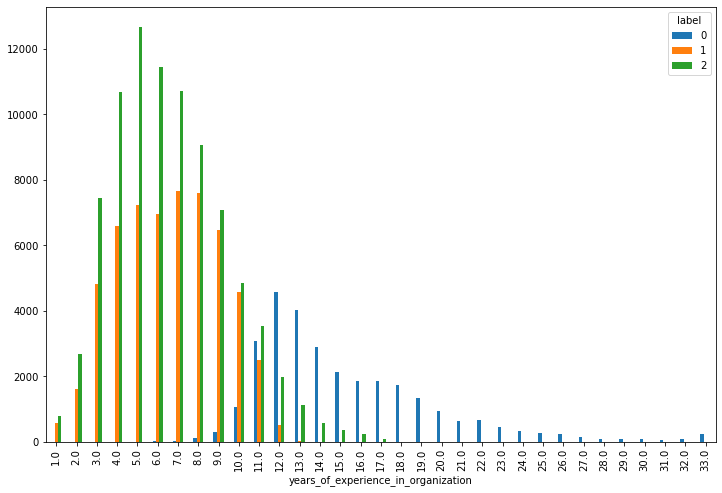

In [119]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],
            
       ).plot(kind = "bar")

#### Majority of Learners are experienced between 1 to 15 years . (49.73%)- (Cluster 2)
#### there is a group of learners having 8 to upto 33 years of experience. (33%) - (Cluster 0)
#### 16.95% of learners who have experiences - (cluster 1) 

In [120]:
clusters.label.value_counts(normalize=True)*100

2    49.734409
1    33.308623
0    16.956968
Name: label, dtype: float64

####  years_of_experience_in_organization per each cluster group of learners 

<AxesSubplot:xlabel='label'>

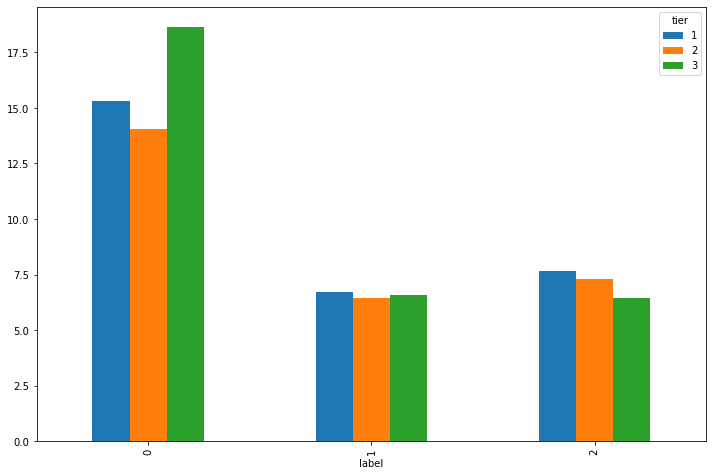

In [121]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],
            values=clusters["years_of_experience_in_organization"],
            aggfunc=np.mean
       ).plot(kind = "bar")

In [122]:
clusters.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization', 'designation_in_organization',
       'classs', 'tier', 'label'],
      dtype='object')

## 

### Statistical Summury based on Each Cluster : 

In [123]:
clusters.groupby("label").describe()[["ctc","classs","tier","years_of_experience_in_organization"]].T

label                                                 0             1  \
ctc                                 count  2.905000e+04  5.706300e+04   
                                    mean   2.543348e+06  1.802940e+06   
                                    std    1.751976e+06  1.272597e+06   
                                    min    3.955000e+04  6.500000e+04   
                                    25%    1.420000e+06  1.000000e+06   
                                    50%    2.100000e+06  1.500000e+06   
                                    75%    3.147500e+06  2.200000e+06   
                                    max    1.250000e+07  1.250000e+07   
classs                              count  2.905000e+04  5.706300e+04   
                                    mean   1.625886e+00  1.544574e+00   
                                    std    6.937293e-01  5.252113e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  1.000000e+00   
                                    50%    2.000000e+00  2.000000e+00   
                                    75%    2.000000e+00  2.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
tier                                count  2.905000e+04  5.706300e+04   
                                    mean   1.484200e+00  1.648774e+00   
                                    std    6.478262e-01  5.742163e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  1.000000e+00   
                                    50%    1.000000e+00  2.000000e+00   
                                    75%    2.000000e+00  2.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
years_of_experience_in_organization count  2.905000e+04  5.706300e+04   
                                    mean   1.520678e+01  6.557945e+00   
                                    std    4.339403e+00  2.474935e+00   
                                    min    6.000000e+00  1.000000e+00   
                                    25%    1.200000e+01  5.000000e+00   
                                    50%    1.400000e+01  7.000000e+00   
                                    75%    1.700000e+01  8.000000e+00   
                                    max    3.300000e+01  1.300000e+01   

label                                                 2  
ctc                                 count  8.520300e+04  
                                    mean   7.562107e+05  
                                    std    5.033019e+05  
                                    min    3.800000e+04  
                                    25%    4.000000e+05  
                                    50%    6.300000e+05  
                                    75%    1.000000e+06  
                                    max    5.600000e+06  
classs                              count  8.520300e+04  
                                    mean   2.831191e+00  
                                    std    3.751798e-01  
                                    min    1.000000e+00  
                                    25%    3.000000e+00  
                                    50%    3.000000e+00  
                                    75%    3.000000e+00  
                                    max    3.000000e+00  
tier                                count  8.520300e+04  
                                    mean   2.900731e+00  
                                    std    3.010974e-01  
                                    min    1.000000e+00  
                                    25%    3.000000e+00  
                                    50%    3.000000e+00  
                                    75%    3.000000e+00  
                                    max    3.000000e+00  
years_of_experience_in_organization count  8.520300e+04  
                                    mean   6.541436e+00  
                        

#### 

#### 

#### 

### Insights & Recommendations:
1. Three clustering models were developed for segment of learners provided by Scaler:
    (i)  Manual Clustering
    (ii) Unsupervised Clustering : K- means, Hierarchical Clustering
2. 1017 unique job positions are there in the dataset
3. 857 unique job positions are there in the dataset after preprocessing strings
4. Based on dendrogram, we can observe there are 3 clusters in the data based on similarity
5. Based on k-Means Clustering algorithm output, as well as manual clustering, learners from tier1 company receiving very high      CTC   
6. Majority of Learners are experienced between 1 to 15 years . (49.73%)- (Cluster 2)
7. There is a group of learners having 8 to upto 33 years of experience. (33%) - (Cluster 0)
8. 16.95% of learners who have experiences - (cluster 1)
9. Experienced learners between 6 to 10 years of experience, earning above 40 LPA up to 1.5Cr.